### import packages and data

In [239]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [242]:
print(pd.__version__, sklearn.__version__)

1.0.4 0.21.3


In [199]:
df = pd.read_csv('Downloads/preprocessed_data.csv')

### data exploration

In [200]:
df.head(5)

,index,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,22,2,8,0,261,5,0,1,2,0,0,1,0,2
1,23,2,7,0,261,5,3,0,0,1,0,1,0,2
2,25,2,8,0,261,5,0,1,0,0,1,1,3,2
3,26,3,4,0,261,5,0,0,0,1,0,1,0,2
4,27,1,1,2,261,5,2,0,0,1,1,0,3,2


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74500 entries, 0 to 74499
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   74500 non-null  int64
 1   x1      74500 non-null  int64
 2   x2      74500 non-null  int64
 3   x3      74500 non-null  int64
 4   x4      74500 non-null  int64
 5   x5      74500 non-null  int64
 6   x6      74500 non-null  int64
 7   x7      74500 non-null  int64
 8   x8      74500 non-null  int64
 9   x9      74500 non-null  int64
 10  x10     74500 non-null  int64
 11  x11     74500 non-null  int64
 12  x12     74500 non-null  int64
 13  y       74500 non-null  int64
dtypes: int64(14)
memory usage: 8.0 MB


In [202]:
df.describe()

,index,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
count,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000,74500.000000
mean,61038.915570,2.058268,5.815289,0.648510,157.766443,6.830282,1.408362,0.328886,0.851195,1.162792,0.269785,0.327396,0.356966,1.724765
std,34836.530338,0.697402,2.730294,1.138097,92.641015,2.828997,1.665433,0.469812,0.537814,0.864004,0.473808,0.565920,0.971940,0.463681
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30423.750000,2.000000,4.000000,0.000000,96.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,61421.000000,2.000000,7.000000,0.000000,147.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,90827.250000,2.000000,8.000000,2.000000,222.000000,10.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,122035.000000,13.000000,9.000000,3.000000,341.000000,11.000000,7.000000,1.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000


In [203]:
for column in df: 
    print(f'{column} --- {df[column].unique()}')

index --- [    22     23     25 ... 122033 122034 122035]
x1 --- [ 2  3  1  4  0  6  5  7  8  9 11 13 10 12]
x2 --- [8 7 4 1 6 9 0 5 3 2]
x3 --- [0 2 3 1]
x4 --- [261 267 282 303 232 239 241 251 312 327 240 245 233 234 235 236 237 238
 242 243 244 246 247 248 249 250 253 260 289 307 231 201 211 193 194 196
 200 202 214 215 216 219 223 224 226 229 264 268 284 296 323 339 340 195
 207 208 209 210 212 213 222 225 190 191 192 197 199 203 204 205 206 139
 155 171 175 147 165 299 300 336 168 174 315 317 318 341 149 138 142 143
 144 145 148 152 154 156 157 158 159 160 162 163 164 166 167 169 170 172
 176 255 259 304 306 311 316 319 332 140 146 151 153   8  12  16 320 335
   7  13 189 310 324   9   5   6  10  11  14 305  15  43  46  48  49  61
  72  73  64  67 257 301  42  44  45  47  51  52  53  54  55  56  57  58
  60  62  63  65  66  68  69  71  74  75  76  77  78  79  80  81 179 254
 278 292 294 302 322 328 330  50  59  70 104 106 113 121 123 124 125 127
 130 221 230 274 321 105 131 338 10

/Users/hinavuijk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/hinavuijk/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

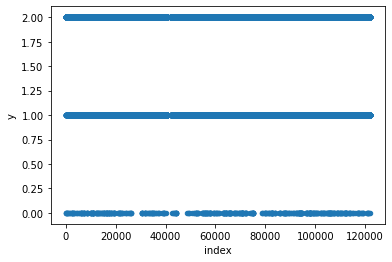

<Figure size 432x288 with 0 Axes>

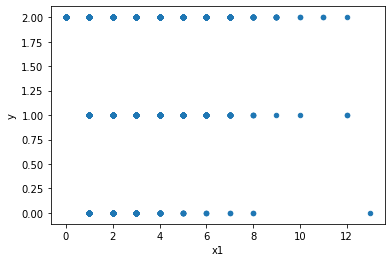

<Figure size 432x288 with 0 Axes>

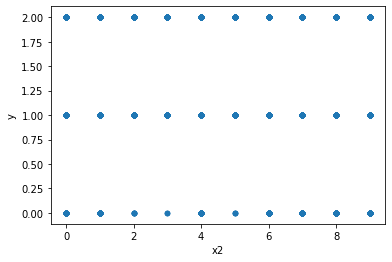

<Figure size 432x288 with 0 Axes>

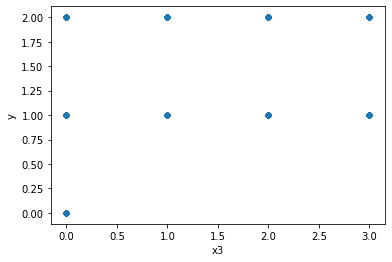

<Figure size 432x288 with 0 Axes>

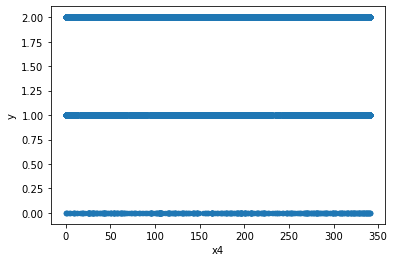

<Figure size 432x288 with 0 Axes>

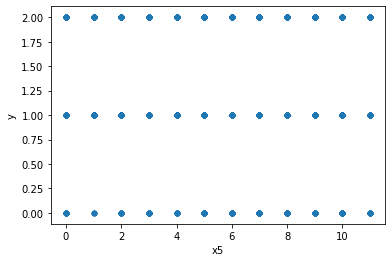

<Figure size 432x288 with 0 Axes>

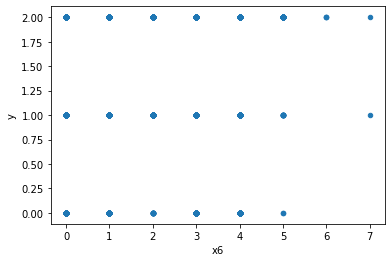

<Figure size 432x288 with 0 Axes>

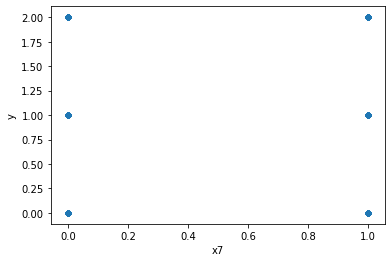

<Figure size 432x288 with 0 Axes>

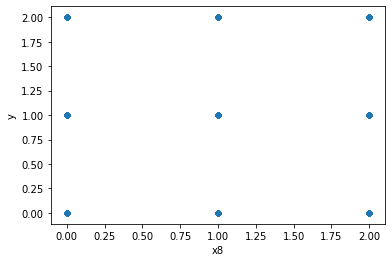

<Figure size 432x288 with 0 Axes>

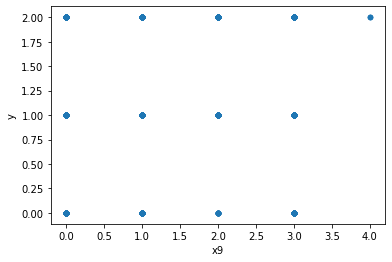

<Figure size 432x288 with 0 Axes>

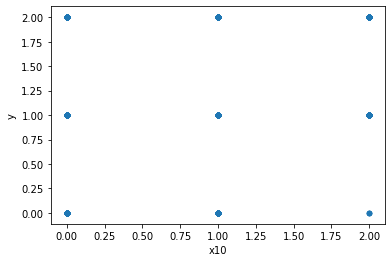

<Figure size 432x288 with 0 Axes>

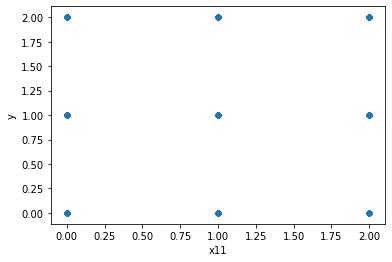

<Figure size 432x288 with 0 Axes>

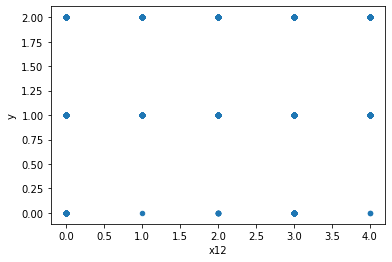

<Figure size 432x288 with 0 Axes>

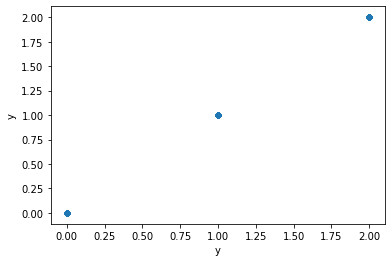

In [204]:
# try to visually find some relationships
for column in df.columns:
    df = df.sort_values(by=column)
    plt.figure()
    df.plot.scatter(column, 'y')

### model training

In [205]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['index', 'y'], axis=1), df['y'], test_size = 0.2)

In [206]:
# choose random x columns to see effect on model performance
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df.drop(['index', 'y', 'x3', 'x7', 'x8', 'x11'], axis=1), df['y'], test_size = 0.2)

In [207]:
# choose random x columns to see effect on model performance
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df.drop(['index', 'y', 'x1', 'x4'], axis=1), df['y'], test_size = 0.2)

In [229]:
# choose random x columns to see effect on model performance
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(df[['x1','x2','x4','x5']], df['y'], test_size = 0.2)

#### 1. decision tree

In [215]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_model.score(x_test, y_test)

0.6921476510067114

In [216]:
dt_model_2 = DecisionTreeClassifier().fit(x_train_2, y_train_2)
dt_model_2.score(x_test_2, y_test_2)

0.7154362416107383

In [217]:
dt_model_3 = DecisionTreeClassifier().fit(x_train_3, y_train_3)
dt_model_3.score(x_test_3, y_test_3)

0.7248993288590604

In [230]:
dt_model_4 = DecisionTreeClassifier().fit(x_train_4, y_train_4)
dt_model_4.score(x_test_4, y_test_4)

0.7620134228187919

#### 2. gradient boosting

In [220]:
gb_model = GradientBoostingClassifier(random_state=0).fit(x_train, y_train)
gb_model.score(x_test, y_test)

0.7765771812080537

In [221]:
gb_model_2 = GradientBoostingClassifier(random_state=0).fit(x_train_2, y_train_2)
gb_model_2.score(x_test_2, y_test_2)

0.7785906040268457

In [222]:
gb_model_3 = GradientBoostingClassifier(random_state=0).fit(x_train_3, y_train_3)
gb_model_3.score(x_test_3, y_test_3)

0.7697315436241611

In [223]:
gb_model_4 = GradientBoostingClassifier(random_state=0).fit(x_train_4, y_train_4)
gb_model_4.score(x_test_4, y_test_4)

0.7371140939597316

### save model

In [232]:
pickle.dump(dt_model_4, open('model.pickle', 'wb'))